Model: Random Forest
Testing data Accuracy: 0.9096
Training data Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     17496
         1.0       0.94      0.96      0.95     17695
         2.0       0.91      0.83      0.87     17540

    accuracy                           0.91     52731
   macro avg       0.91      0.91      0.91     52731
weighted avg       0.91      0.91      0.91     52731

Test Confusion Matrix:
[[16489    14   993]
 [  378 16943   374]
 [ 2031   976 14533]]
Train Confusion Matrix:
[[40919     0     5]
 [    6 41198     1]
 [   14     0 40896]]




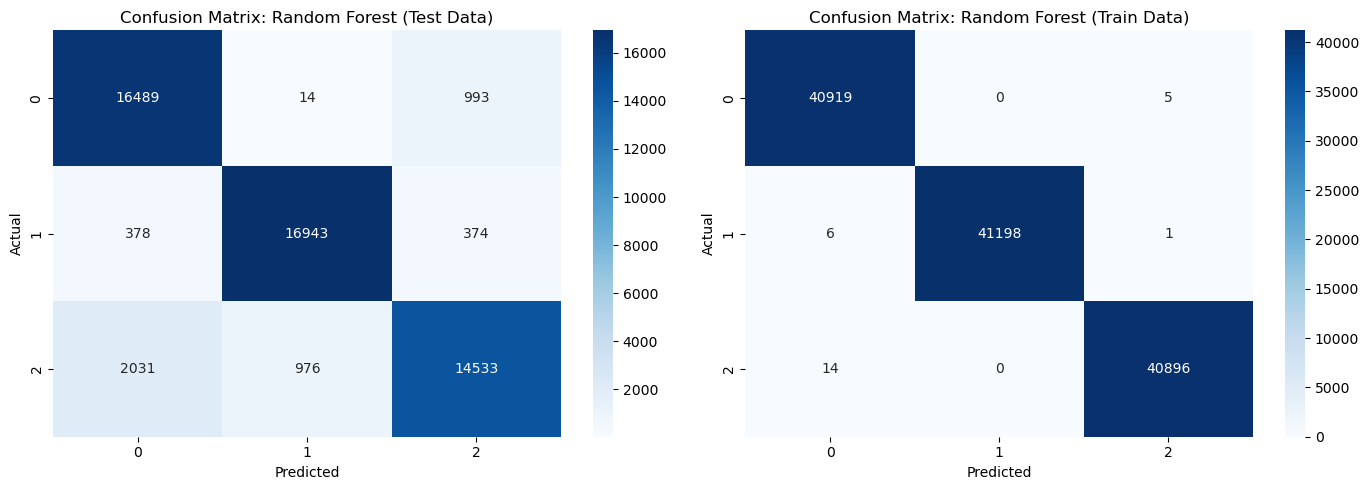

Model: Logistic Regression
Testing data Accuracy: 0.5619
Training data Accuracy: 0.5660
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.65      0.63     17496
         1.0       0.48      0.40      0.44     17695
         2.0       0.56      0.64      0.60     17540

    accuracy                           0.56     52731
   macro avg       0.56      0.56      0.56     52731
weighted avg       0.56      0.56      0.56     52731

Test Confusion Matrix:
[[11307  3474  2715]
 [ 4627  7163  5905]
 [ 2196  4186 11158]]
Train Confusion Matrix:
[[26585  7879  6460]
 [10600 16867 13738]
 [ 5065  9659 26186]]




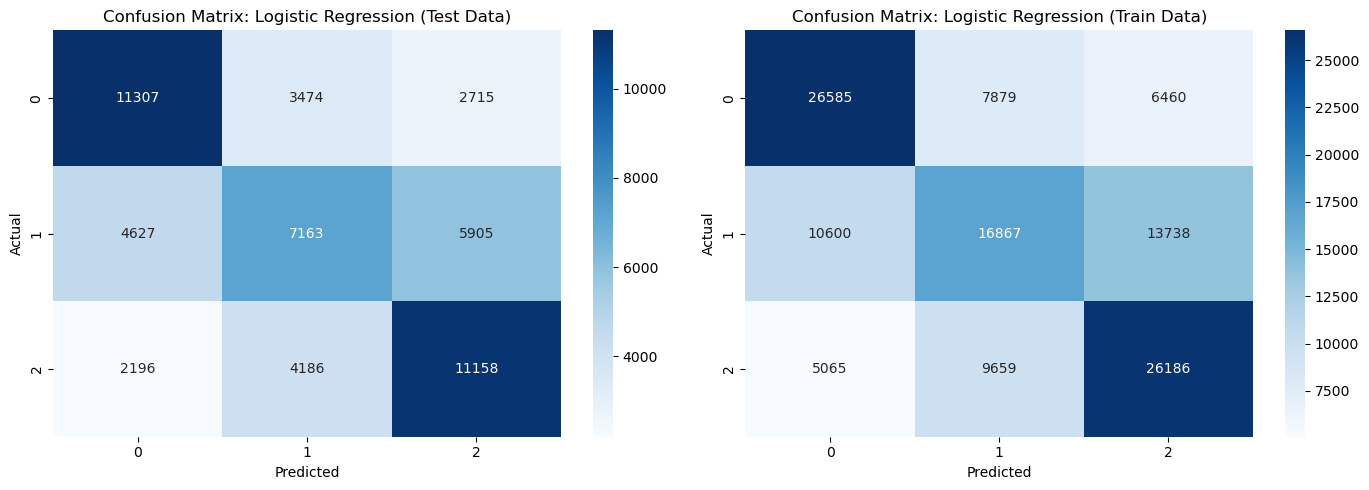

Model: Gradient Boosting
Testing data Accuracy: 0.7657
Training data Accuracy: 0.7680
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     17496
         1.0       0.74      0.75      0.74     17695
         2.0       0.69      0.61      0.65     17540

    accuracy                           0.77     52731
   macro avg       0.76      0.77      0.76     52731
weighted avg       0.76      0.77      0.76     52731

Test Confusion Matrix:
[[16373    18  1105]
 [  701 13326  3668]
 [ 2092  4769 10679]]
Train Confusion Matrix:
[[38263    45  2616]
 [ 1477 31231  8497]
 [ 4906 11009 24995]]




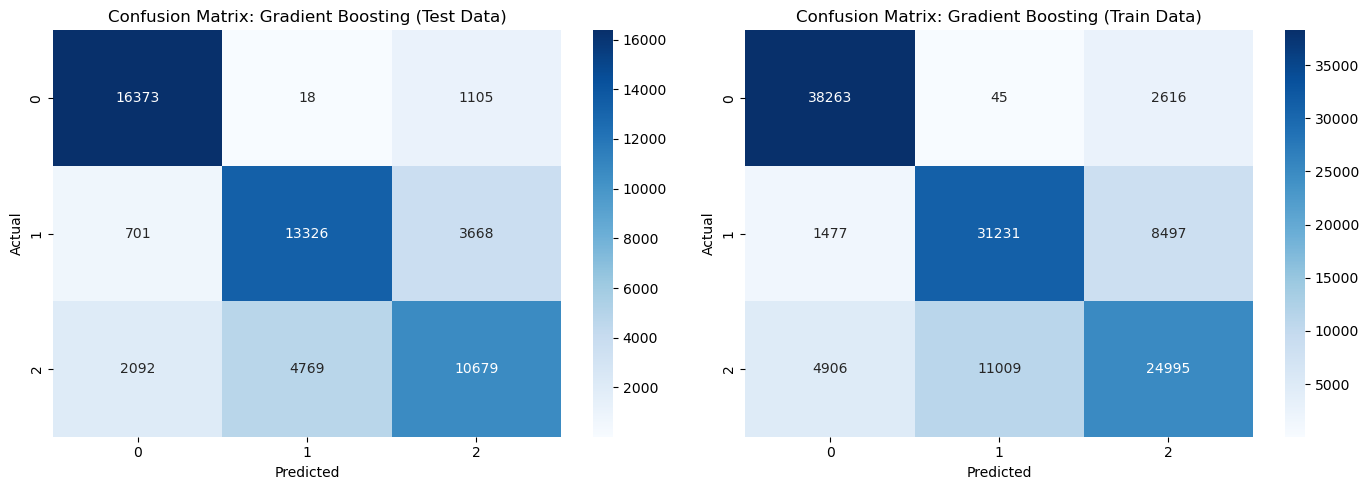

Model: SVM
Testing data Accuracy: 0.5618
Training data Accuracy: 0.5675
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.53      0.65     17496
         1.0       0.81      0.29      0.42     17695
         2.0       0.43      0.87      0.58     17540

    accuracy                           0.56     52731
   macro avg       0.69      0.56      0.55     52731
weighted avg       0.69      0.56      0.55     52731

Test Confusion Matrix:
[[ 9226    39  8231]
 [  817  5079 11799]
 [ 1061  1160 15319]]
Train Confusion Matrix:
[[21708    76 19140]
 [ 1818 12159 27228]
 [ 2345  2606 35959]]




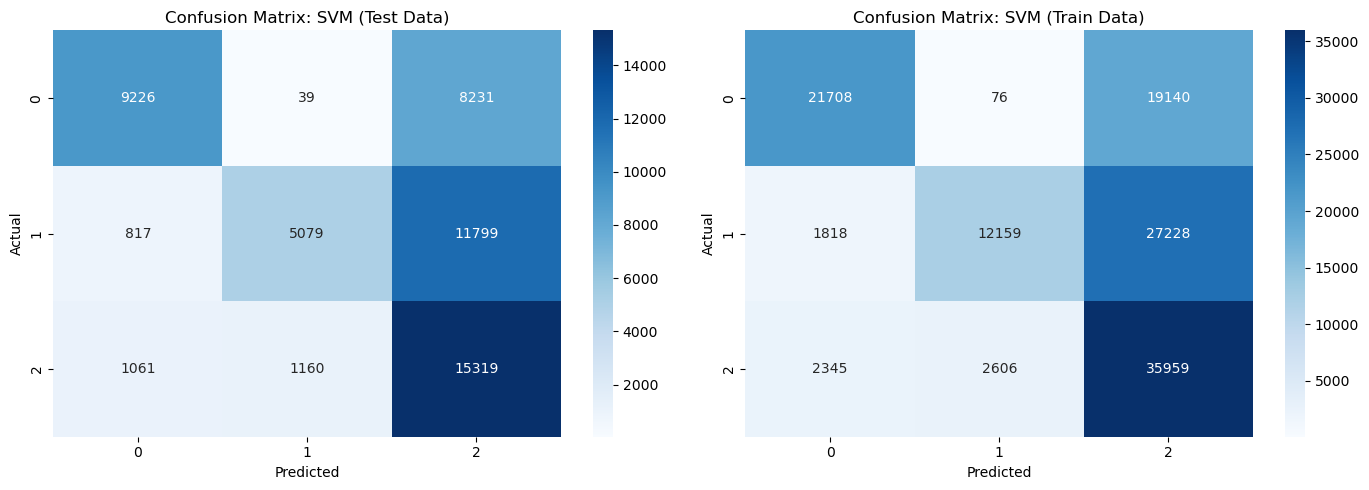

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the test data
X_test = pd.read_csv('/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/data/X_test.csv')
y_test = pd.read_csv('/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/data/y_test.csv').squeeze()  # Ensure y_test is a Series, not a DataFrame

# Load the training data for evaluation purposes
X_train = pd.read_csv('/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/data/X_train.csv')
y_train = pd.read_csv('/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/data/y_train.csv').squeeze()  # Ensure y_train is a Series, not a DataFrame

# List of models and their corresponding paths
models = {
    'Random Forest': '/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/models/random_forest.pkl',
    'Logistic Regression': '/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/models/logistic_regression.pkl',
    'Gradient Boosting': '/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/models/gradient_boosting.pkl',
    'SVM': '/home/e19452/ml_project/e19-co544-Diabetes-Health-Indicator/models/svm_model.pkl'
}

# Dictionary to store evaluation results
results = {}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training data evaluation
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_confusion_mat = confusion_matrix(y_train, y_train_pred)
    
    # Testing data evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    test_confusion_mat = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, test_confusion_mat, train_accuracy, train_confusion_mat

# Evaluate each model
for model_name, model_path in models.items():
    # Load the model from file
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    # Evaluate the model
    accuracy, report, test_confusion_mat, train_accuracy, train_confusion_mat = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy,
        'training set accuracy': train_accuracy,
        'report': report,
        'test_confusion_matrix': test_confusion_mat,
        'train_confusion_matrix': train_confusion_mat
    }

# # Print and visualize results for each model
# for model_name, result in results.items():
#     print(f"Model: {model_name}")
#     print(f"Testing data Accuracy: {result['accuracy']:.4f}")
#     print(f"Training data Accuracy: {result['training set accuracy']:.4f}")
#     print("Classification Report:")
#     print(result['report'])
#     print("Test Confusion Matrix:")
#     print(result['test_confusion_matrix'])
#     print("Train Confusion Matrix:")
#     print(result['train_confusion_matrix'])
#     print("\n")
    
#     # Visualize confusion matrices
#     fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#     # Test Confusion Matrix
#     sns.heatmap(result['test_confusion_matrix'], annot=True, fmt="d", cmap="Blues", ax=axes[0])
#     axes[0].set_title(f'Confusion Matrix: {model_name} (Test Data)')
#     axes[0].set_xlabel('Predicted')
#     axes[0].set_ylabel('Actual')

#     # Train Confusion Matrix
#     sns.heatmap(result['train_confusion_matrix'], annot=True, fmt="d", cmap="Blues", ax=axes[1])
#     axes[1].set_title(f'Confusion Matrix: {model_name} (Train Data)')
#     axes[1].set_xlabel('Predicted')
#     axes[1].set_ylabel('Actual')

#     plt.tight_layout()
#     plt.show()
